In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
print(df['sex'].unique())
print(df['smoker'].unique())
print(df['region'].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [6]:
# check missing or null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
df = pd.get_dummies(df, drop_first=True)

In [10]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [11]:
df.corr()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
sex_male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


In [12]:
import seaborn as sns

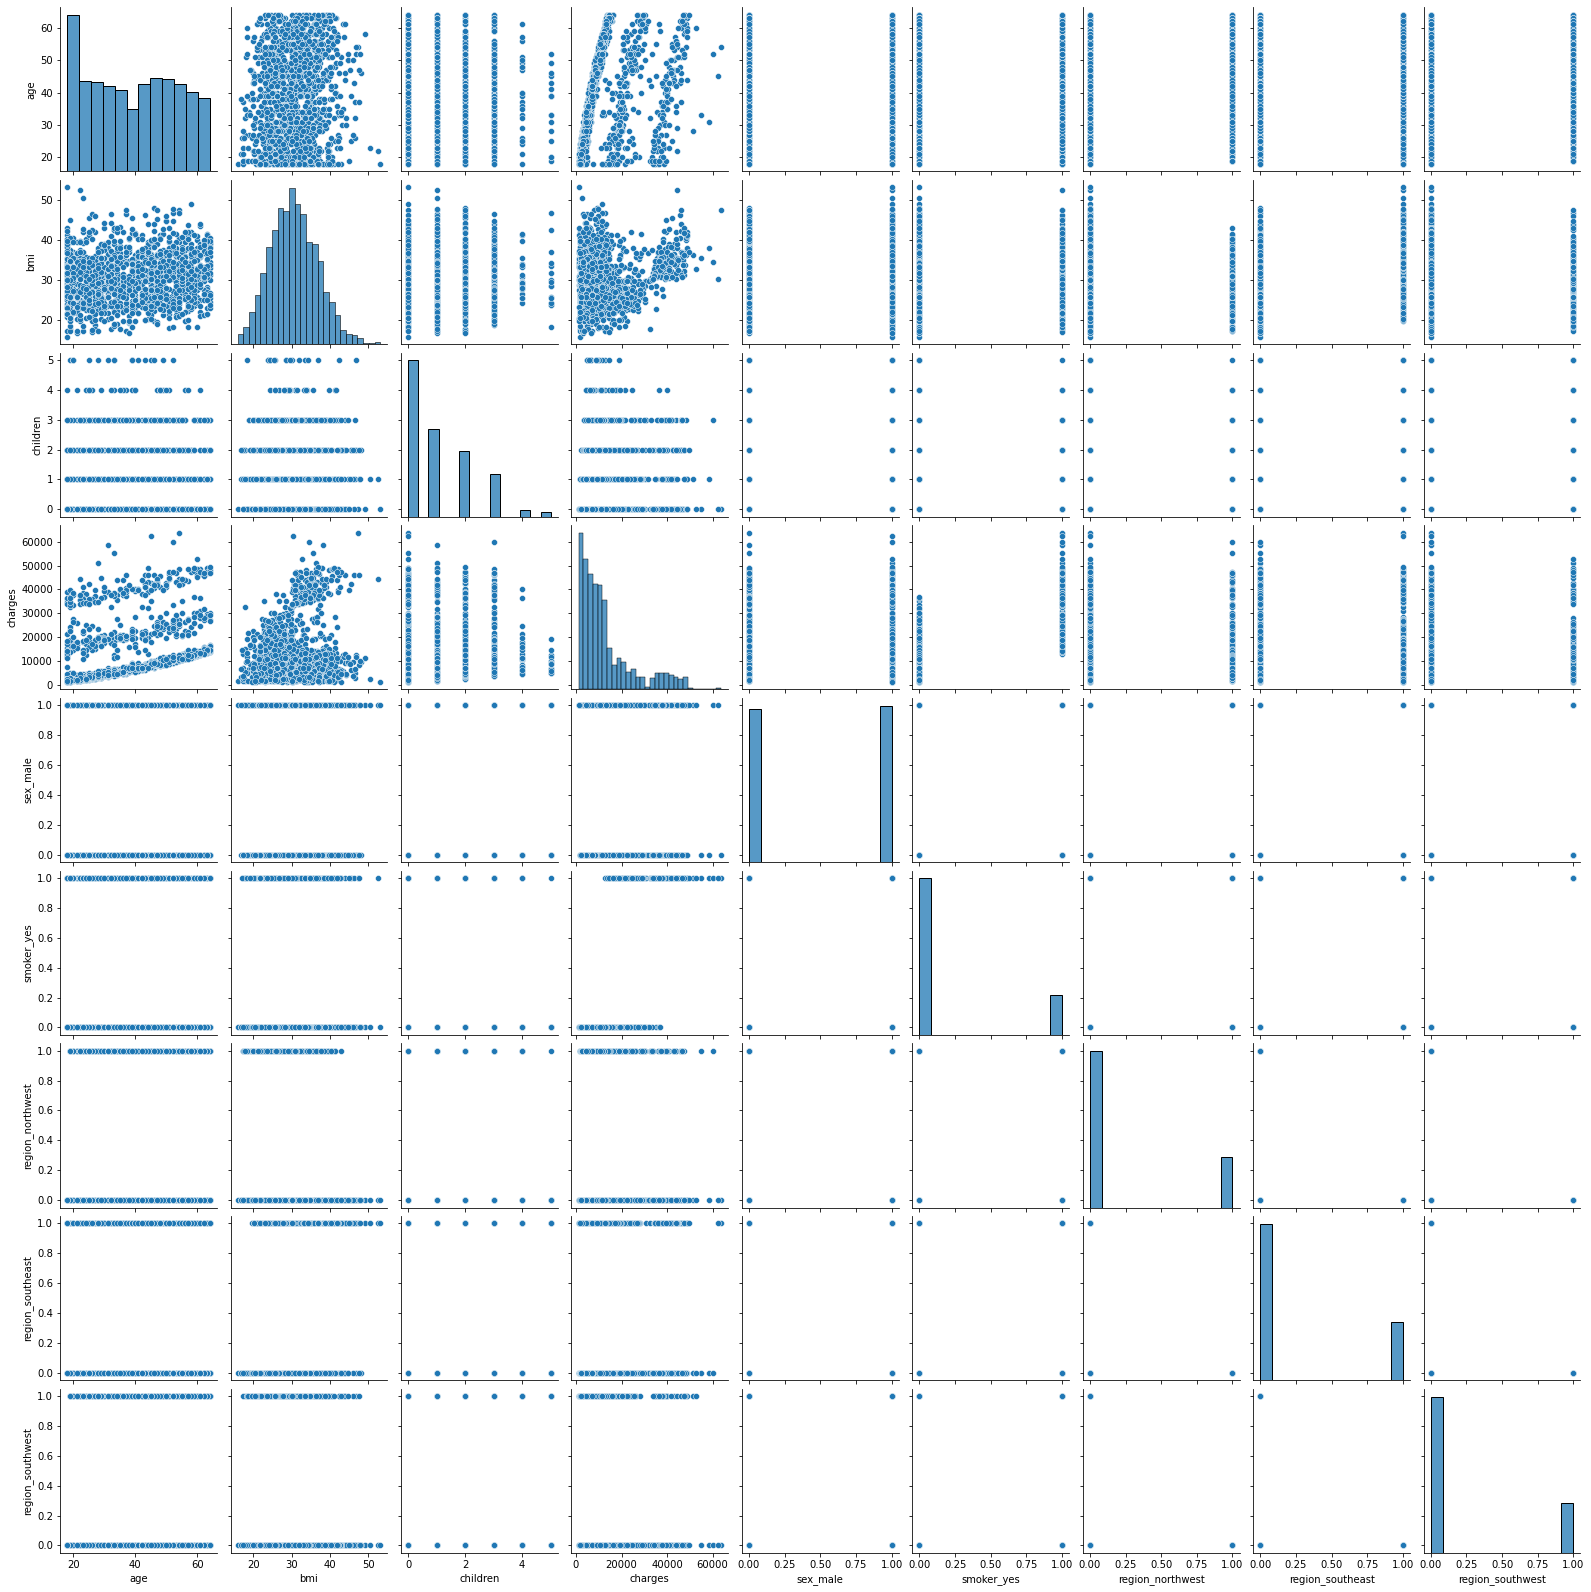

In [13]:
sns.pairplot(df)

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

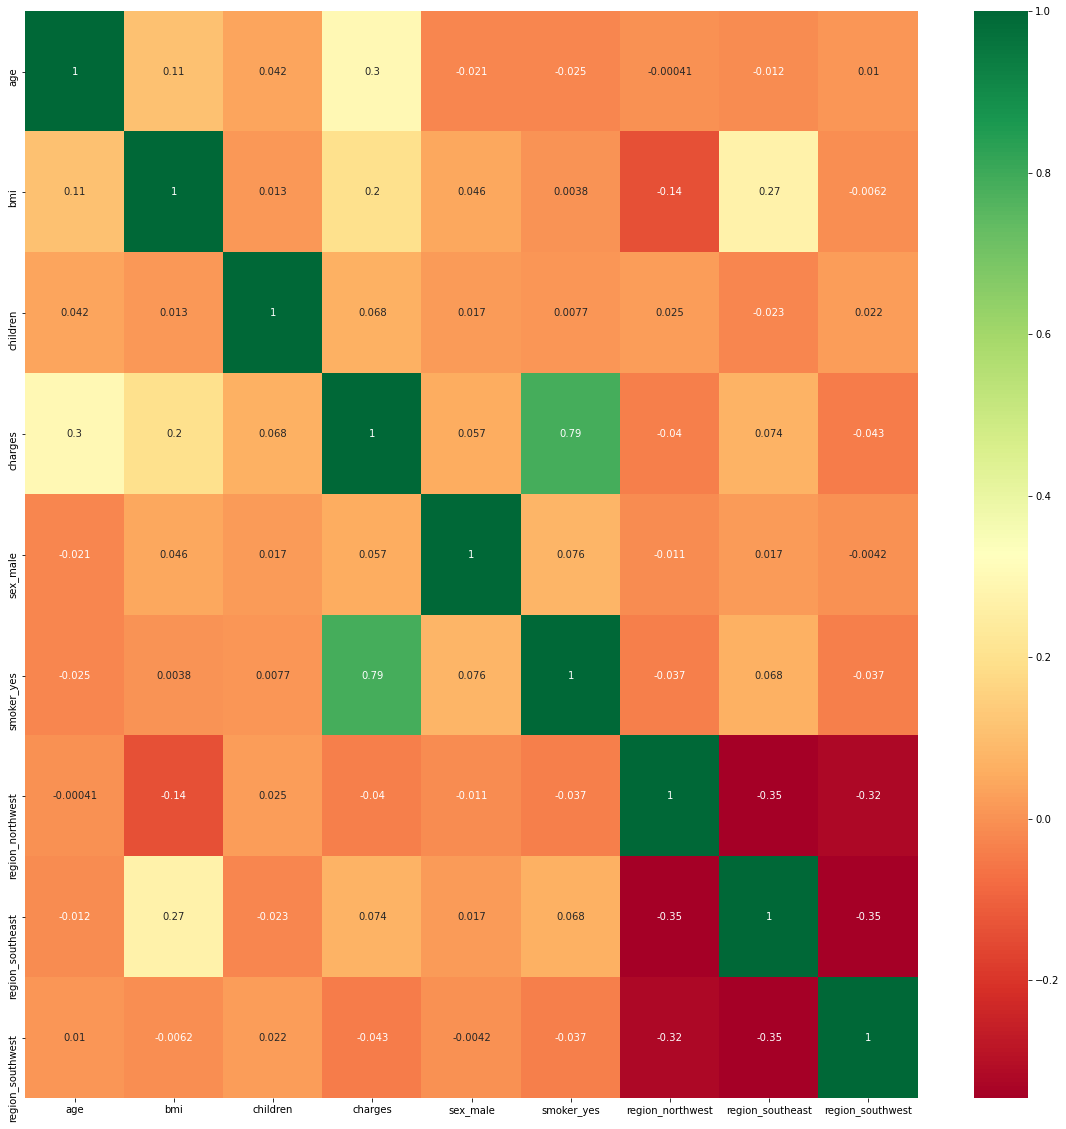

In [15]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

# plot heat map
g = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [16]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [17]:
X = df[['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']]
y = df['charges']

In [18]:
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [19]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [20]:
# Feature Importance
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [21]:
print(model.feature_importances_)

[0.12899356 0.19173715 0.02427991 0.01061221 0.62059197 0.00895507
 0.00884692 0.00598322]


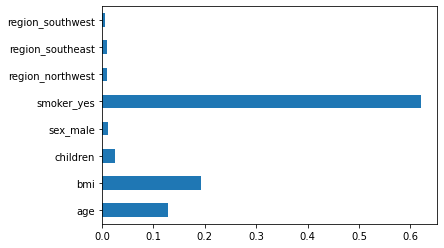

In [22]:
# plot graph of features
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [24]:
X_train

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
812,54,21.010,2,1,0,0,1,0
948,42,31.255,0,1,0,1,0,0
1169,37,34.105,1,0,0,1,0,0
234,39,24.510,2,1,0,1,0,0
695,26,40.185,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
494,21,25.700,4,1,1,0,0,1
1146,60,32.800,0,1,1,0,0,1
354,18,38.280,0,0,0,0,1,0
957,24,26.790,1,1,0,1,0,0


In [25]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

In [26]:
# Hyperparameters
import numpy as np
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [27]:
# Randomized search cv

# num trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

# num features to consider at each split
max_features = ['auto', 'sqrt']

# max num levels in each tree
max_depth = [int(x) for x in np.linspace(5,30,num=6)]

#max_depth.append(None)

# min num of samples to split a node
min_samples_split = [2,5,10,15,100]

# min num of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [28]:
from sklearn.model_selection import RandomizedSearchCV

In [29]:
# create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [30]:
# use random grid to search for best hyperparameters
# first create the base model to tune
rf = RandomForestRegressor()

In [31]:
rf_random = RandomizedSearchCV(estimator=rf, 
                               param_distributions=random_grid, 
                               scoring='neg_mean_squared_error', 
                               n_iter=10, 
                               cv=5, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs=1)

In [ ]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


In [37]:
predictions = rf_random.predict(X_test)

In [38]:
predictions

array([14447.07084333, 11979.29830113, 35166.89927599, 11028.82814505,
       17101.40534927, 27427.23212659,  7488.03729724,  2811.73335548,
       23134.76967892,  7014.98565738, 12103.04471091,  9332.89852477,
       45033.95810489,  7195.12083616,  7693.86369184, 10864.85254825,
       12450.08734245, 12300.95314938, 14217.56743702,  5810.43509429,
       20535.68242774, 11830.71132664,  7398.08576053,  6517.52088391,
        6889.43768338, 35518.89716895,  7580.78522293,  5762.18877256,
       11716.19537723,  4397.90647254,  5560.41851147, 22987.74030869,
        8530.1226603 , 11883.69893228,  5721.94938715,  9459.43324211,
       20336.54065979,  8226.47087845,  2030.64935351,  6992.93579019,
        4106.95072942, 11232.91281954, 16663.51221645,  7646.94110375,
       12125.19034863, 11267.50892342, 12924.98364858,  4115.48296371,
       16613.40206722,  4539.91222229, 35212.46477211,  5209.2123742 ,
        2713.87496382,  2200.50794697,  2453.20104889,  6457.01813101,
      

/Users/parkerlee/opt/anaconda3/envs/capstone/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

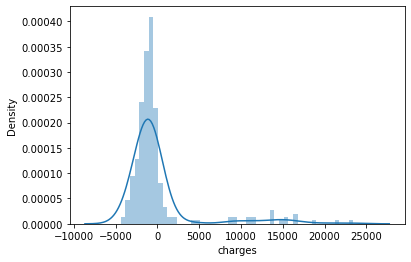

In [39]:
sns.distplot(y_test - predictions)

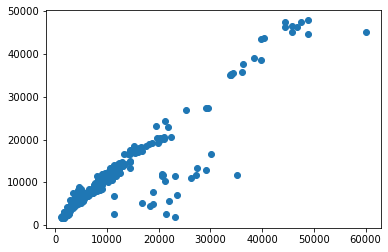

In [40]:
plt.scatter(y_test, predictions)

In [41]:
import pickle

with open('random_forest_regression_model.pkl', 'wb') as file:
    pickle.dump(rf_random, file)